# Roeske et al, 2020<br />**Songbirds and music**

**Paper:** Roeske, T. C., Tchernichovski, O., Poeppel, D., & Jacoby, N. (2020). Categorical Rhythms Are Shared between Songbirds and Humans. *Current Biology*, S0960982220309246. [DOI: 10/ghhxnf](https://doi.org/10/ghhxnf)

**Music dataset:** Roeske, Tina; Jacoby, Nori (2020), “Musical rhythm: Onsets/intervals of seven music corpora”, Mendeley Data, V2, DOI: [10.17632/s4cjj7h5sv.2](https://dx.doi.org/10.17632/s4cjj7h5sv.2)

**Birdsong dataset:** Roeske, Tina; Tchernichovski, Ofer (2020), “Birdsong rhythm: Onsets/intervals of a zebra finch song corpus and 3 thrush nightingale song corpora”, Mendeley Data, V1, DOI: [10.17632/zhb728dc4z.1](https://dx.doi.org/10.17632/zhb728dc4z.1)

**Dataset license:** [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sys
sys.path.append('../')
from rhythmplot import *

# Directory to all the raw data (included in this repository)
DATA_DIR = '../data/roeske2020'
ORIGINAL_DATA_DIR = f'{DATA_DIR}/original-data'

# Function to save figures: you can easily toggle this on/off globally
savefig = get_figure_saver(group='roeske2020', save_pdf=False, save_png=False)

## Preprocess

**Note:** most of the text below is copy-pasted from the above data repository or other parts of their supplementary materials.

### Music corpora

| Style | onsets | pieces/performances | solo/multi-instrumental |
|---|---|---|---|
| North Indian Raga | 86,822 | 8 | multi |
| Cuban Salsa | 38,056 | 40 | multi |
| Uruguayan Candombe | 47,998 | 39 | multi |
| Malian Jembe | 42,195 | 46 | multi |
| Tunisian Stambeli | 27,451 | 9 | multi |
| Persian Zarb | 32,416 | 64 | solo |
| Western piano / Bach | 260,653 | 156 | solo |

"The musical corpora include performances in which several instruments played simultaneously. In these cases, we analyzed each instrument separately, and aggregated the resulting two-interval ratios across instruments as a second step. For comparison, we also present instrument-combined interval data. We obtained these by extracting onsets from each instrument individually, but then combining these onsets."

"Overall the two types of extraction (separate for each instrument and simultaneous for combined ‘‘surface’’ rhythm) produced similar results (see Figure S1)."
*(BC: Well, if you compare them in S1, they are quite different: in 3 out of 5 corpora they note strong differences)*

*BC: It's not entirely clear to me how they combined/aggregated ratios across instruments. The paper suggests that the surface rhythm: all instruments overlaid, mixed if you like. And then I guess the sseparate version just concatenates all instruments?*

2. `IntervalData_MalianJembe_corpus.mat`: 
Malian Jembe, multi-instrument music, from IEMP corpus (https://osf.io/y5jxm/). 
Two variables: 
"MalianJembe_intervals_ms": onset-onset intervals, instruments separated;
"MalianJembe_INSTRUMENTSCOMBINED_intervals_ms": onset-onset intervals, instruments combined

3. `IntervalData_NorthIndianRaga_corpus.mat: 
North Indian (Hindustani) Raga, multi-instrument, original recordings from the IEMP corpus (https://osf.io/3cmg4/). 
Two variables: 
"NorthIndianRaga_intervals_ms": onset-onset intervals, instruments separated;
"NorthIndianRaga_INSTRUMENTSCOMBINED_intervals_ms": onset-onset intervals, instruments combined. 

4. `IntervalData_TunisianStambeli_corpus.mat`: 
Tunisian Stambeli, multi-instrument music, original recordings from the IEMP corpus (https://osf.io/qaxdy/). 
Two variables: 
"TunisianStambeli_intervals_ms": onset-onset intervals, instruments separated;
"TunisianStambeli_INSTRUMENTSCOMBINED_intervals_ms": onset-onset intervals, instruments combined.

5. `IntervalData_UruguayanCandombe_corpus.mat`: 
Uruguayan Candombe, multi-instrument music, original recordings from the IEMP corpus (https://osf.io/4q9g7/). 
Two variables: 
"UruguayanCandombe_intervals_ms": onset-onset intervals, instruments separated;
"UruguayanCandombe_INSTRUMENTSCOMBINED_intervals_ms": onset-onset intervals, instruments combined (see above).

6. `IntervalData_PianoBach_corpus.mat`: 
Western piano (Bach) solo performances, from MAESTRO dataset (https://arxiv.org/abs/1810.12247). 
One variable:
"PianoBach_intervals_ms": onset-onset intervals.

7. `IntervalData_PersianZarb_corpus.mat`
Zarb solo playing by 5 performers from commercial recordings.
One variable:
"PersianZarb_intervals_ms": vector of onset-onset intervals.

In [2]:
corpora = [
    ('CubanSalsa', 'cuban_salsa', True),
    ('MalianJembe', 'malian_jembe', True),
    ('NorthIndianRaga', 'north_indian_raga', True),
    ('PersianZarb', 'persian_zarb', False),
    ('PianoBach', 'western_piano', False),
    ('TunisianStambeli', 'tunisian_stambeli', True),
    ('UruguayanCandombe', 'uruguayan_candombe', True)
]

for old_name, new_name, combined in corpora:
    mat = loadmat(f'{ORIGINAL_DATA_DIR}/IntervalData_{old_name}_corpus.mat')
    intervals = mat[f'{old_name}_intervals_ms'][:, 0] / 1000
    # save_intervals(intervals, 'roeske2020', f'{new_name}')

    if combined:
        mat = loadmat(f'{ORIGINAL_DATA_DIR}/IntervalData_{old_name}_corpus.mat')
        intervals = mat[f'{old_name}_INSTRUMENTSCOMBINED_intervals_ms'][:, 0] / 1000
        # save_intervals(intervals, 'roeske2020', f'{new_name}-surface')

### Birdsong

*(From the documentation)*

**Zebra finch data `IntervalData_ZebraFinch_corpus.mat`**  

This file contains variable "ZebraFinch_intervals_ms": A vector of syllable onset-onset intervals of zebra finch song in ms. NAN entries mark boundaries of singing bouts. Song is from 93 captive zebra finches recorded at the Rockefeller field center in Millbrook, NY. Details are described in file "METHODS4IntervalData_processing of birdsong.pdf".


**Thrush nihtingale data `IntervalData_ThrushNightingale_3corpora.mat`**

This file contains the following datasets: 

1. **Corpus 1 - full song dataset:**<br />
  "ThrushNightingaleSongs_intervals_ms": vector of syllable onset-onset intervals of thrush nightingale song. NAN entries mark song boundaries. 
  Songs are a subset of 45 recordings obtained from the publicly available birdsong library http://www.xeno-canto.org. Identifiers of the xeno-canto recordings are provided in the file "Pointers_to_xeno-canto_data.mat".  

2. **Corpus 2 - stable rhythm dataset:**<br />
  "ThrushNightingaleStableRhythms_intervals_ms", a subset of Corpus 1 onset-onset intervals. They include only ‘stable rhythms’, i.e. song epochs with stably repeated interval dyads. A description of how this dataset was generated is provided in the file "METHODS4IntervalData_processing of birdsong.pdf".  

3. **Corpus 3 - "same syllable type" dataset:**<br />
  "ThrushNightingaleSameSyllableEpochs_intervals_ms": A vector of syllable onset-onset intervals of trains of same-syllable repetitions from the same 45 xeno-canto recordings underlying Corpus 1. Same-syllable epochs were manually identified as described in file "METHODS4IntervalData_processing of birdsong.pdf".
  "ThrushNightingale_SameSyllableEpochs_onsets_ms": same dataset, onset times in ms, from the beginning of each same-note train. 

In [3]:
# Export intervals
nightingale = loadmat(f'{ORIGINAL_DATA_DIR}/IntervalData_ThrushNightingale_3corpora.mat')
songs = nightingale['ThrushNightingaleSongs_intervals_ms'][:,0] / 1000
stable = nightingale['ThrushNightingaleStableRhythms_intervals_ms'][:,0] / 1000
same_syll = nightingale['ThrushNightingaleSameSyllableEpochs_intervals_ms'][:,0] / 1000

# save_intervals(songs, 'roeske2020', 'nightingale_songs', report=True)
# save_intervals(stable, 'roeske2020', 'nightingale_stable', report=True)
# save_intervals(same_syll, 'roeske2020', 'nightingale_same_syll', report=True)

In [4]:
zebrafinch = loadmat(f'{ORIGINAL_DATA_DIR}/IntervalData_ZebraFinch_corpus.mat')
zebrafinch_ints = zebrafinch['ZebraFinch_intervals_ms'][:, 0] / 1000
# save_intervals(zebrafinch_ints, 'roeske2020', 'zebrafinch', report=True)

## Plot

In [5]:
def show_dur_ranges(motifs, duration, start, end, step, name, **kwargs):
    for start in range(start, end, step):
        fig, tax = ternary_motif_plot(motifs, duration, min_dur=start, max_dur=start+step-1, **kwargs)
        tax.set_title(f'{name} (cycle duration {start}-{start+step-1}ms)')
        plt.show()
        yield fig, tax, start, start+step-1
    return

## Zebra finch

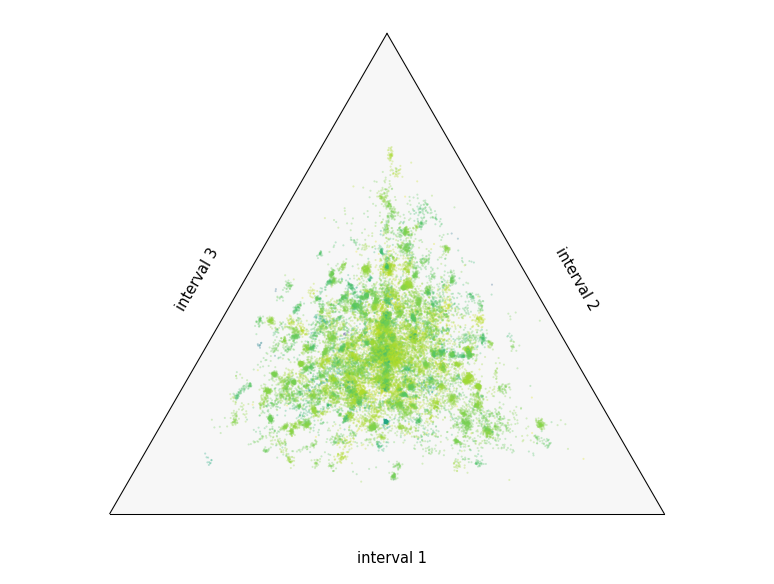

In [6]:
intervals = load_intervals('roeske2020', 'zebrafinch')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
fig, tax = ternary_motif_plot(motifs, duration, 
        ratios=False, cmap='viridis_r', cbar=False
)

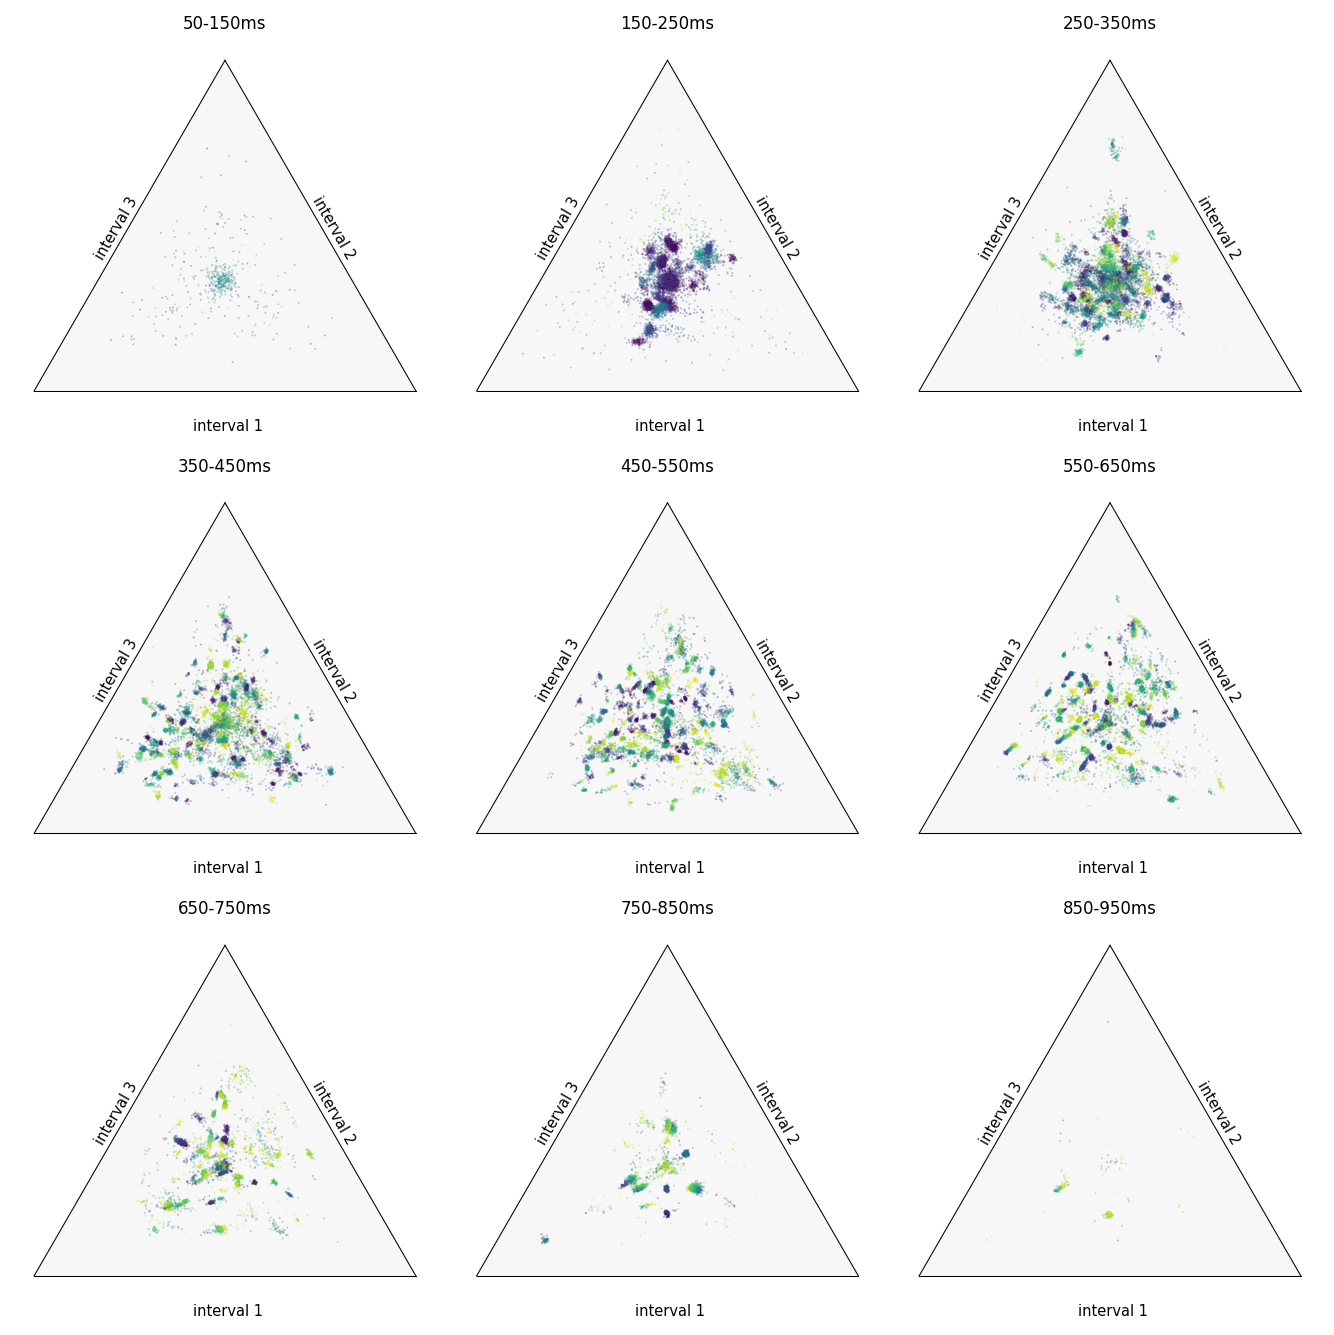

In [7]:
def plot_zebra_finch(min_dur, max_dur, ax):
    intervals = load_intervals('roeske2020', 'zebrafinch')
    motifs, duration = normalize(ngram_motifs(intervals, length=3))
    fig, tax = ternary_motif_plot(motifs, duration, 
        min_dur=min_dur / 1000, max_dur=max_dur / 1000, 
        ratios=False, cmap='viridis_r', cbar=False, 
        limit=10000, ax=ax
        )
    tax.set_title(f'{min_dur}-{max_dur}ms', fontsize=8)

fig, axs = plt.subplots(3, 3, figsize=(9, 9), tight_layout=True)
for n, min_dur in enumerate(np.arange(50, 950, 100)):
    ax = axs[n // 3, n % 3]
    plot_zebra_finch(min_dur, min_dur+100, ax=ax)

# savefig('zebra-finch-per-range')

### What are the different sequences?

In [8]:
# Reconstruct the sequences by splitting the iois at NA values
intervals = load_intervals('roeske2020', 'zebrafinch')
sequences = []
cur_seq = 1
for interval in intervals:
    if np.isnan(interval):
        sequences.append(np.nan)
        cur_seq += 1
    else:
        sequences.append(cur_seq)
assert len(sequences) == len(intervals)

seq_len = pd.value_counts(sequences).to_dict()
seq_lenghts = [seq_len.get(s, np.nan) for s in sequences]

df = pd.DataFrame([intervals, sequences, seq_lenghts], index=['interval', 'sequence', 'seq_len'])
df = df.T

(<Figure size 960x720 with 2 Axes>,
 TernaryAxesSubplot: 300213957,
 <matplotlib.colorbar.Colorbar at 0x131ab9e90>)

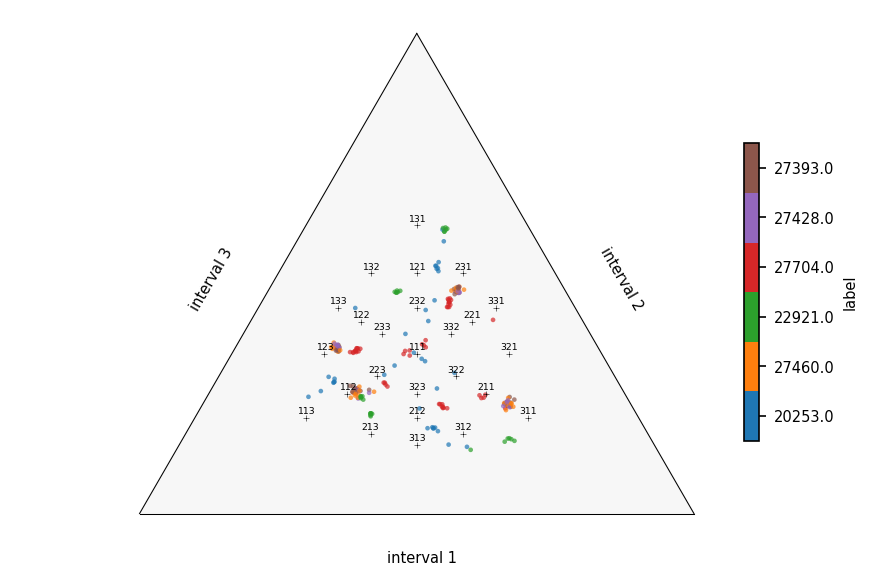

In [9]:
# Are the clusters sequence-specific? Seems like it
subset = separate_sequences(df[df['seq_len'] == 55])
motifs, duration = normalize(ngram_motifs(subset['interval'], length=3))
labels = string_motifs(subset['sequence'], 3, aggregator=lambda motif: motif[0])
ternary_motif_plot(motifs, duration, labels=labels, min_dur=300 /1000,
    scatter_kws=dict(s=5, alpha=.7), cmap='tab10')

## Nightingale

Text(0.5, 1.0, 'Nightingale songs (100–700ms)')

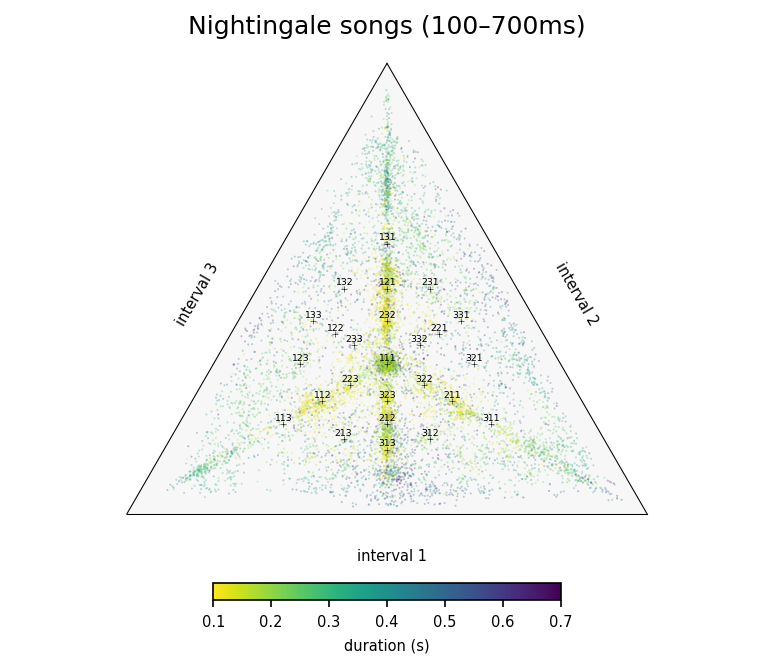

In [10]:
intervals = load_intervals('roeske2020', 'nightingale_songs')
motifs, duration = normalize(ngram_motifs(intervals, length=3))
ternary_motif_plot(motifs, duration, min_dur=100/1000, max_dur=700/1000, cmap='viridis_r')
plt.title(f'Nightingale songs (100–700ms)')